In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('../01-Data/00-GoogleData/180905_venue_data.xlsx')
df.head(2)

,name,lat,long,google_id,venue_type,Monday,Tuesday,Wednesday,Thursday,Friday,...,neighborhood,price_category,type_count_in_neighborhood,type_density_in_neighborhood,visit_venue_density,walk_score,transit_score,bike_score,transit_summary,average_walk_score
0,"McMahon & Associates, PC",42.352366,-71.056066,ChIJddqFA4Jw44kRHz6p3qWTs4c,"['accounting', 'lawyer', 'finance', 'point_of_...",0,0,0,0,0,...,LD/SS,0,27,235.83,0.0,98.0,100.0,82.0,"78 nearby routes: 50 bus, 16 rail, 12 other",93.333333
1,"Barclay Damon, LLP",42.352321,-71.056248,ChIJD75e1YBw44kRvDZoMEj44jY,"['accounting', 'lawyer', 'finance', 'point_of_...",0,0,0,0,0,...,LD/SS,0,27,235.83,0.0,98.0,100.0,82.0,"78 nearby routes: 50 bus, 16 rail, 12 other",93.333333


In [3]:
df.transit_summary.replace(np.NaN, 'no information available', inplace=True)

bus_routes = list()
rail_routes = list()
other_routes = list()

for record in df['transit_summary']:
    if record == 'no information available':
        bus_routes.append(0)
        rail_routes.append(0)
        other_routes.append(0)
    else:
        record = record.split(': ')
        record = record[1:][0]
        record = record.split(', ')
        #print(record)
        bus = record[0].split(' ')[0]
        rail = record[1].split(' ')[0]
        other = record[2].split(' ')[0]
        #print(bus)
        #print(rail)
        #print(other)
        #print('---------------------------------_')
        
        bus_routes.append(int(bus))
        rail_routes.append(int(rail))
        other_routes.append(int(other))

df['nearby_bus_routes'] = bus_routes
df['nearby_rail_routes'] = rail_routes
df['nearby_other_routes'] = other_routes

#df.head(2)

In [4]:
n_transit = df.groupby(['neighborhood'])['nearby_bus_routes','nearby_rail_routes','nearby_other_routes'].mean()

In [5]:
n_transit.reset_index(inplace=True)
n_transit

,neighborhood,nearby_bus_routes,nearby_rail_routes,nearby_other_routes
0,Chinatown,29.135823,9.127334,4.611205
1,Downtown,35.455954,10.982871,7.516313
2,Downtown Waterfront,38.166667,12.900794,9.738095
3,Fort Point,24.889937,8.805031,5.591195
4,LD/SS,41.180645,13.208602,9.862366
5,Other,12.782785,3.441941,1.484113
6,Seaport,19.401420,6.712145,6.521293
7,South Boston,9.717111,1.994020,0.702852
8,South End,5.440353,1.648748,0.002209


<Figure size 1080x1080 with 0 Axes>

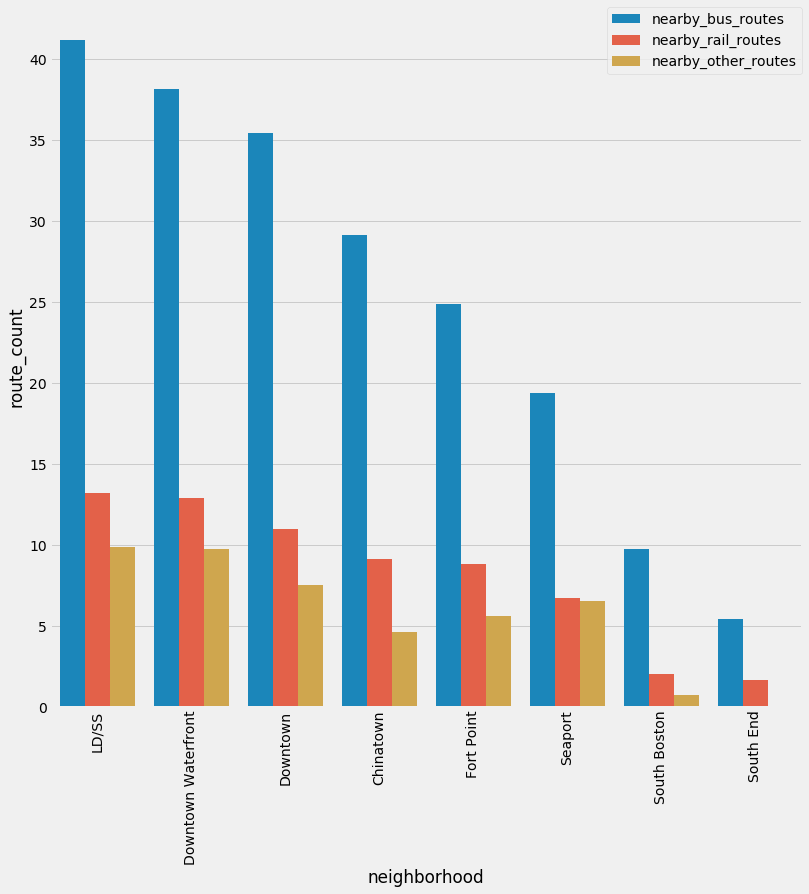

In [13]:
import seaborn as sns

plt.figure(figsize=(15,15),facecolor='white')
plt.style.use('fivethirtyeight')
f, ax = plt.subplots(1, figsize=(12,12))

n_transit = df.groupby(['neighborhood'])['nearby_bus_routes','nearby_rail_routes','nearby_other_routes'].mean()
n_transit.reset_index(inplace=True)

a = list()
b = list()
c = list()

for i in range(len(n_transit)):
    a.append(n_transit.iloc[i]['neighborhood'])
    b.append(n_transit.iloc[i]['nearby_bus_routes'])
    c.append('nearby_bus_routes')
    a.append(n_transit.iloc[i]['neighborhood'])
    b.append(n_transit.iloc[i]['nearby_rail_routes'])
    c.append('nearby_rail_routes')
    a.append(n_transit.iloc[i]['neighborhood'])
    b.append(n_transit.iloc[i]['nearby_other_routes'])
    c.append('nearby_other_routes')
    
transit_plot_data = pd.DataFrame({'neighborhood':a,'route_count':b,'route_type':c})
transit_plot_data = transit_plot_data[transit_plot_data['neighborhood']!='Other']
transit_plot_data.sort_values(['route_count'],inplace=True,ascending=False)

sns.barplot(x='neighborhood',y='route_count',data=transit_plot_data, hue='route_type')
plt.xticks(rotation='vertical')
plt.legend(loc=1,ncol=1, borderaxespad=0.)


plt.savefig("../01-Data/02-Plots/180917_NeighborhoodTransitOptions.jpg")

<Figure size 1080x1080 with 0 Axes>

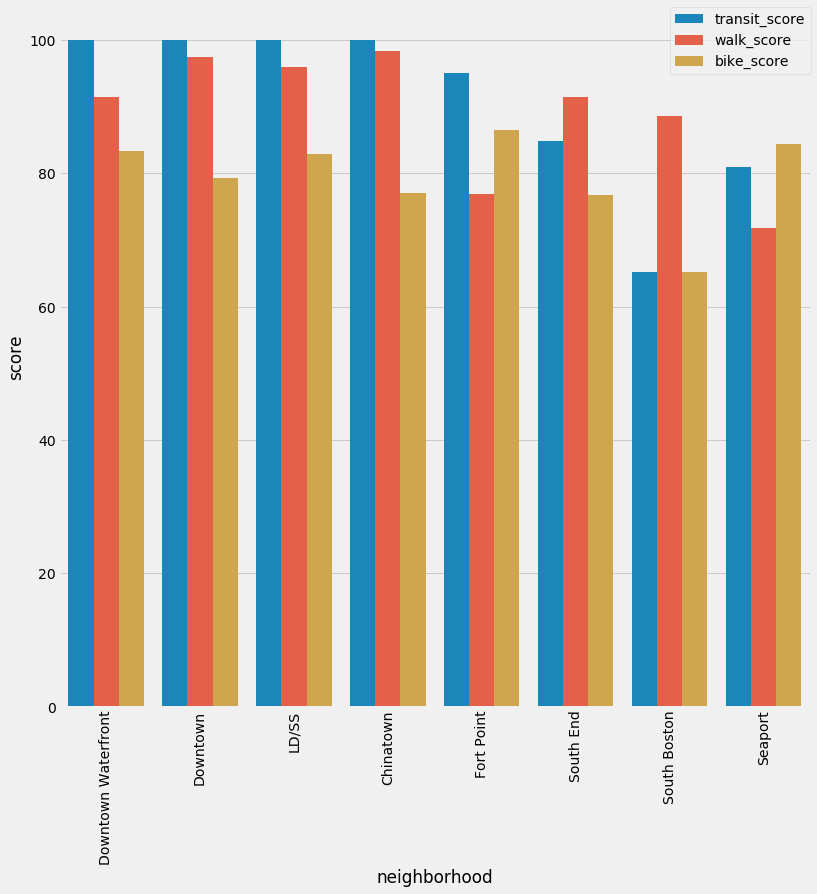

In [12]:
plt.figure(figsize=(15,15),facecolor='white')
plt.style.use('fivethirtyeight')
f, ax = plt.subplots(1, figsize=(12,12))

n_walk_score = pd.DataFrame(df.groupby(['neighborhood'])['walk_score','bike_score','transit_score'].mean())
n_walk_score.reset_index(inplace=True)

a = list()
b = list()
c = list()

for i in range(len(n_walk_score)):
    a.append(n_walk_score.iloc[i]['neighborhood'])
    b.append(n_walk_score.iloc[i]['walk_score'])
    c.append('walk_score')
    a.append(n_walk_score.iloc[i]['neighborhood'])
    b.append(n_walk_score.iloc[i]['bike_score'])
    c.append('bike_score')
    a.append(n_walk_score.iloc[i]['neighborhood'])
    b.append(n_walk_score.iloc[i]['transit_score'])
    c.append('transit_score')
    
walk_score_plot_data = pd.DataFrame({'neighborhood':a,'score':b,'score_type':c})
walk_score_plot_data = walk_score_plot_data[walk_score_plot_data['neighborhood']!='Other']
walk_score_plot_data.sort_values(['score'],inplace=True,ascending=False)

sns.barplot(x='neighborhood',y='score',data=walk_score_plot_data,hue='score_type')
plt.xticks(rotation='vertical')
plt.legend(loc=1,ncol=1, borderaxespad=0.)

plt.savefig("../01-Data/02-Plots/180917_NeighborhoodWalkScore.jpg")

<Figure size 1080x1080 with 0 Axes>

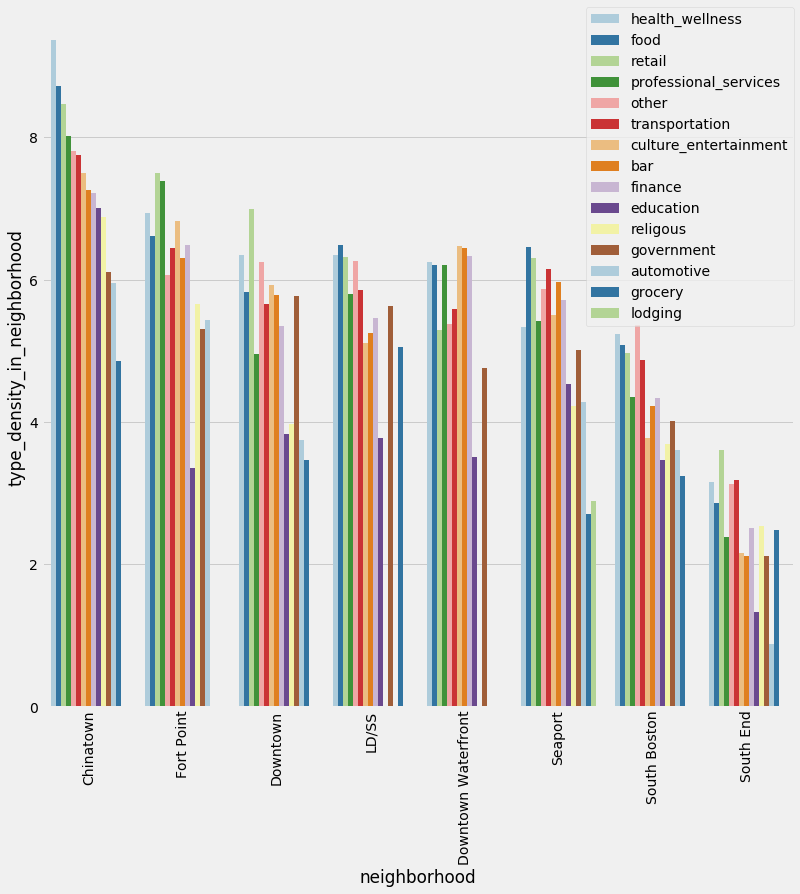

In [11]:
plt.figure(figsize=(15,15),facecolor='white')
plt.style.use('fivethirtyeight')
f, ax = plt.subplots(1, figsize=(12,12))

n_venue_density = pd.DataFrame(df.groupby(['neighborhood','mapped_venue_type'])['type_density_in_neighborhood'].mean())
n_venue_density.reset_index(inplace=True)

n_venue_density['type_density_in_neighborhood'] = np.log(n_venue_density['type_density_in_neighborhood'])
n_venue_density.sort_values(['type_density_in_neighborhood'],inplace=True,ascending=False)

n_venue_density = n_venue_density[n_venue_density['neighborhood']!='Other']
sns.barplot(x='neighborhood',y='type_density_in_neighborhood',data=n_venue_density,hue='mapped_venue_type',palette='Paired')
plt.xticks(rotation='vertical')
plt.legend(loc=1,ncol=1, borderaxespad=0.)

plt.savefig("../01-Data/02-Plots/180917_VenueDensity.jpg")

<Figure size 1080x1080 with 0 Axes>

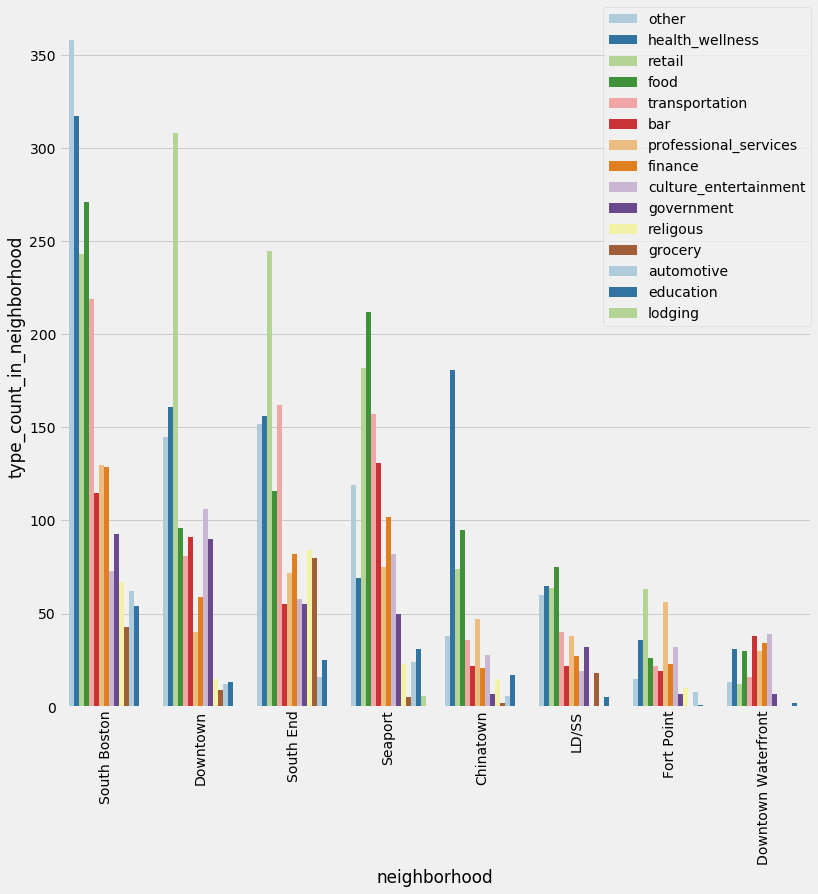

In [10]:
plt.figure(figsize=(15,15),facecolor='white')
plt.style.use('fivethirtyeight')
f, ax = plt.subplots(1, figsize=(12,12))

n_venue_count = pd.DataFrame(df.groupby(['neighborhood','mapped_venue_type'])['type_count_in_neighborhood'].mean())
n_venue_count.reset_index(inplace=True)

n_venue_count.sort_values(['type_count_in_neighborhood'],inplace=True,ascending=False)

n_venue_count = n_venue_count[n_venue_count['neighborhood']!='Other']
sns.barplot(x='neighborhood',y='type_count_in_neighborhood',data=n_venue_count,hue='mapped_venue_type',palette='Paired')
plt.xticks(rotation='vertical')
plt.legend(loc=1,ncol=1, borderaxespad=0.)

plt.savefig("../01-Data/02-Plots/180917_VenueTypeCount.jpg")